In [1]:
import warnings
warnings.filterwarnings('ignore')

## Producer sentiment analysis

In [48]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
#use social network scraper to get tweets that contain words 'beef production'
query = 'beef production cost' 
tweets = []
limit = 5000
#for loop is appending twets to the list
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
#creating DataFrame from the list        
df_tweets = pd.DataFrame(tweets)



In [49]:
#Cleaning Data-adding column location
df_tweets['user_location'] =  df_tweets['user'].apply(lambda x: x['location'])

In [50]:
df_tweets.to_csv('beef production.csv')
#df_tweets =pd.read_csv(r'farming cost increase.csv')

In [51]:
df_tweets.head()

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,user_location
0,https://twitter.com/MzTeel/status/152779960555...,2022-05-20 23:53:05+00:00,@BlackSavage70 @drboycewatkins1 No it’s not tr...,@BlackSavage70 @drboycewatkins1 No it’s not tr...,1527799605555089412,"{'username': 'MzTeel', 'id': 151521906, 'displ...",3,0,4,0,...,None,None,1.527782e+18,"{'username': 'BlackSavage70', 'id': 1467592915...","[{'username': 'BlackSavage70', 'id': 146759291...",None,None,None,None,Florida
1,https://twitter.com/GamechangerBeef/status/152...,2022-05-20 16:14:04+00:00,We know feed bills are on the rise. That's why...,We know feed bills are on the rise. That's why...,1527684090631278594,"{'username': 'GamechangerBeef', 'id': 14870612...",0,0,2,0,...,None,None,NaN,None,None,None,None,None,None,
2,https://twitter.com/goodtinesranch/status/1526...,2022-05-18 07:59:23+00:00,"@tspencer322 @unusual_whales Beef, Chicken, Po...","@tspencer322 @unusual_whales Beef, Chicken, Po...",1526834823234560001,"{'username': 'goodtinesranch', 'id': 142606511...",1,0,2,0,...,None,None,1.526793e+18,"{'username': 'tspencer322', 'id': 2217620740, ...","[{'username': 'tspencer322', 'id': 2217620740,...",None,None,None,None,
3,https://twitter.com/AgManagerInfo/status/15262...,2022-05-16 18:00:00+00:00,Risk Management on the Farm\nONLINE CLASS\nA f...,Risk Management on the Farm\nONLINE CLASS\nA f...,1526261196696993794,"{'username': 'AgManagerInfo', 'id': 1581494005...",0,0,1,0,...,None,None,NaN,None,None,None,None,None,None,"Manhattan, KS USA"
4,https://twitter.com/amunratep/status/152551491...,2022-05-14 16:34:32+00:00,@RBReich Here's what liberals don't say- when ...,@RBReich Here's what liberals don't say- when ...,1525514914189791236,"{'username': 'amunratep', 'id': 792623640, 'di...",0,0,0,0,...,None,None,1.525483e+18,"{'username': 'RBReich', 'id': 148529707, 'disp...","[{'username': 'RBReich', 'id': 148529707, 'dis...",None,None,None,None,Northern Wall


In [52]:
#Cleaning Data-flter and keep only columns that we will use in the dataset
df_tweets= df_tweets.filter(['content','user_location'], axis=1)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        1342 non-null   object
 1   user_location  1342 non-null   object
dtypes: object(2)
memory usage: 21.1+ KB


In [53]:
#Cleaning Data-change words in the 'content' column to lower case
df_tweets['content'] = df_tweets['content'].apply(lambda x:x.lower())
df_tweets['content']

0       @blacksavage70 @drboycewatkins1 no it’s not tr...
1       we know feed bills are on the rise. that's why...
2       @tspencer322 @unusual_whales beef, chicken, po...
3       risk management on the farm\nonline class\na f...
4       @rbreich here's what liberals don't say- when ...
                              ...                        
1337    while eating lunch, beef terriyaki, i was thin...
1338    cost of cattle production. from our sunup #ag ...
1339    #cont ...with carbon cost of transporting chic...
1340    @scotteweinberg it's probably because zombie's...
1341    - us beef industry worried ethanol production ...
Name: content, Length: 1342, dtype: object

In [54]:
#import natural processing toolkit stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
#Cleaning Data-remove english stopwords
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_tweets['content'].head()

0    @blacksavage70 @drboycewatkins1 it’s true. set...
1    know feed bills rise. that's gamechanger opera...
2    @tspencer322 @unusual_whales beef, chicken, po...
3    risk management farm online class five-part se...
4    @rbreich here's liberals say- tesla makes bill...
Name: content, dtype: object

In [56]:
#Cleaning Data-remove special characters
df_tweets['content'] = df_tweets['content'].str.replace('[^\w\s]','')
df_tweets['content'].head()

0    blacksavage70 drboycewatkins1 its true set cos...
1    know feed bills rise thats gamechanger operate...
2    tspencer322 unusual_whales beef chicken pork g...
3    risk management farm online class fivepart ser...
4    rbreich heres liberals say tesla makes billion...
Name: content, dtype: object

In [57]:
#Cleaning Data-check for most frequent words in the 'content column'
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('beef', 1590),
 ('production', 1429),
 ('cost', 1428),
 ('farmers', 193),
 ('meat', 171),
 ('price', 168),
 ('amp', 160),
 ('cattle', 143),
 ('us', 137),
 ('would', 126),
 ('food', 115),
 ('high', 114),
 ('costs', 112),
 ('prices', 106),
 ('feed', 83),
 ('less', 77),
 ('produce', 75),
 ('per', 74),
 ('industry', 72),
 ('environmental', 72),
 ('need', 71),
 ('much', 71),
 ('lower', 71),
 ('producers', 70),
 ('market', 70),
 ('dairy', 70),
 ('like', 66),
 ('milk', 65),
 ('one', 63),
 ('uk', 62),
 ('carbon', 61),
 ('land', 61),
 ('also', 60),
 ('even', 59),
 ('chicken', 56),
 ('farm', 56),
 ('know', 55),
 ('make', 54),
 ('emissions', 54),
 ('use', 53),
 ('pay', 51),
 ('low', 51),
 ('higher', 51),
 ('increase', 51),
 ('still', 50),
 ('people', 50),
 ('new', 49),
 ('true', 47),
 ('pork', 47),
 ('get', 47)]

In [58]:
#using lemmitize function to converts the word to its meaningful base form (lemma)
from textblob import Word
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_tweets['content'].head()


0    blacksavage70 drboycewatkins1 it true set cost...
1    know feed bill rise thats gamechanger operates...
2    tspencer322 unusual_whales beef chicken pork g...
3    risk management farm online class fivepart ser...
4    rbreich here liberal say tesla make billion po...
Name: content, dtype: object

In [59]:
#Cleaning Data-check for most frequent words in the 'content column' after applying lemmatiser
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('beef', 1601),
 ('cost', 1540),
 ('production', 1429),
 ('price', 274),
 ('farmer', 226),
 ('meat', 180),
 ('amp', 160),
 ('u', 148),
 ('cattle', 143),
 ('food', 127),
 ('would', 126),
 ('high', 115),
 ('producer', 94),
 ('need', 89),
 ('market', 87),
 ('feed', 86),
 ('industry', 86),
 ('farm', 78),
 ('produce', 78),
 ('le', 78),
 ('it', 77),
 ('make', 75),
 ('lower', 74),
 ('per', 74),
 ('environmental', 72),
 ('dairy', 71),
 ('much', 71),
 ('cow', 71),
 ('increase', 69),
 ('like', 69),
 ('land', 65),
 ('milk', 65),
 ('one', 64),
 ('uk', 63),
 ('product', 63),
 ('year', 63),
 ('animal', 62),
 ('chicken', 61),
 ('carbon', 61),
 ('also', 60),
 ('even', 59),
 ('go', 57),
 ('get', 57),
 ('emission', 57),
 ('know', 55),
 ('pay', 55),
 ('time', 55),
 ('use', 53),
 ('low', 52),
 ('good', 51)]

In [60]:
#import textblob sentiment
from textblob import TextBlob
df_tweets['content'].apply(lambda x: TextBlob(x).sentiment)

0       (0.13749999999999998, 0.3833333333333333)
1                                     (0.15, 0.0)
2                                   (-0.4, 0.475)
3                                      (0.0, 1.0)
4                                      (0.5, 0.5)
                          ...                    
1337                                   (0.2, 0.2)
1338                                   (0.5, 0.5)
1339                                 (-0.6, 0.95)
1340                                   (0.0, 0.0)
1341                                   (0.0, 0.0)
Name: content, Length: 1342, dtype: object

In [61]:
#as textblob sentiment is returning two atributes- polarity and subjectivity.
#we are only interested in first - polarity
df_tweets['sentiment']= df_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweets

,content,user_location,sentiment
0,blacksavage70 drboycewatkins1 it true set cost...,Florida,0.1375
1,know feed bill rise thats gamechanger operates...,,0.1500
2,tspencer322 unusual_whales beef chicken pork g...,,-0.4000
3,risk management farm online class fivepart ser...,"Manhattan, KS USA",0.0000
4,rbreich here liberal say tesla make billion po...,Northern Wall,0.5000
...,...,...,...
1337,eating lunch beef terriyaki thinking much coul...,Makati | Davao,0.2000
1338,cost cattle production sunup ag tv show httpww...,Oklahoma,0.5000
1339,cont with carbon cost transporting chicken som...,London,-0.6000
1340,scotteweinberg probably zombie film cost le 20...,"Austin, TX",0.0000


In [62]:
#check dataset structure
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content        1342 non-null   object 
 1   user_location  1342 non-null   object 
 2   sentiment      1342 non-null   float64
dtypes: float64(1), object(2)
memory usage: 31.6+ KB


In [63]:
#use condition to change sentiment values to 1, 0, and -1 depending on the value. 
#if value is grater than 0, change value to 1 (positive sentiment). If value is less than 0, change value to -1 (negative sentiment)
# if value equals to zero, asign 0 (neutral sentiment)
df_tweets['sentiment'] = df_tweets['sentiment'].apply(lambda x:-1 if x <0 else (1 if x>0 else 0))

In [64]:
df_tweets.head()

,content,user_location,sentiment
0,blacksavage70 drboycewatkins1 it true set cost...,Florida,1
1,know feed bill rise thats gamechanger operates...,,1
2,tspencer322 unusual_whales beef chicken pork g...,,-1
3,risk management farm online class fivepart ser...,"Manhattan, KS USA",0
4,rbreich here liberal say tesla make billion po...,Northern Wall,1


In [65]:
#Positive neutral negative sentiment count
df_tweets.sentiment.value_counts()

 1    675
 0    362
-1    305
Name: sentiment, dtype: int64

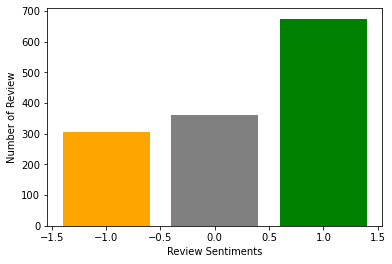

In [66]:
#use barplot to visualise number of sentiments
color = ('orange', 'grey', 'green')
from matplotlib import pyplot as plt
Sentiment_count=df_tweets.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'],color =color)
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [67]:
#vectoriser summarize how often a word appears within all tweet.
# and then downscales words that appear frequently
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_tweets = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
df_tweets_normalised = tfid_tweets.fit_transform(df_tweets['content'])
print(df_tweets_normalised)

  (0, 717)	0.04938314017773562
  (0, 988)	0.25077286486769557
  (0, 962)	0.22593809187887604
  (0, 370)	0.16895711843061234
  (0, 656)	0.2639934469564599
  (0, 836)	0.31167835293231677
  (0, 164)	0.3041840203039757
  (0, 490)	0.25077286486769557
  (0, 703)	0.2735761576494663
  (0, 69)	0.1981395968877122
  (0, 426)	0.2868435799434972
  (0, 84)	0.27408823517360825
  (0, 787)	0.2531448928061182
  (0, 583)	0.26713111164459613
  (0, 98)	0.0511811976322289
  (0, 218)	0.04960429413975972
  (0, 832)	0.27408823517360825
  (0, 930)	0.21371995620831608
  (1, 348)	0.1706092345521945
  (1, 128)	0.3114695891810875
  (1, 644)	0.33445393707304205
  (1, 822)	0.3634107908539846
  (1, 303)	0.2980695658396639
  (1, 489)	0.23102684843849208
  (1, 620)	0.3195814575221533
  :	:
  (1338, 346)	0.4012495100791579
  (1338, 717)	0.10117814241195712
  (1338, 98)	0.10486207406435584
  (1338, 218)	0.10163125144844426
  (1339, 301)	0.395887707458441
  (1339, 900)	0.5152767703347535
  (1339, 614)	0.49629890407774013
 

In [68]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tweets_normalised, df_tweets['sentiment'], test_size=0.10, random_state=1)

In [69]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train, y_train)
predicted= mnb.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6370370370370371


In [70]:
#random forest - use the model to predi
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_test,predictions))
#f1-score
print(f1_score(y_test,predictions,average='micro'))
#Accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)
#best model accuracy was 68.8 with 90/10 train/test split (accuracy changes when running model again)

[[ 4  2 17]
 [ 1 19 13]
 [ 4  7 68]]
0.674074074074074
67.4074074074074


## Consumer sentiment analysis

## repeat above steps for consumer related tweets

In [71]:
#get comsumer related tweets
query = 'steak price' 
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)      
df_tweets = pd.DataFrame(tweets)

In [72]:
#Cleaning Data-adding column location
df_tweets['user_location'] =  df_tweets['user'].apply(lambda x: x['location'])

In [73]:
#df_tweets.to_csv('organic food cost.csv')
#df_tweets =pd.read_csv(r'organic food cost.csv')

In [74]:
df_tweets.head()

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,user_location
0,https://twitter.com/MugsPubCalgary/status/1528...,2022-05-22 14:23:07+00:00,Sunday at Mugs! Game 3 Flames Vs Oilers at 6pm...,Sunday at Mugs! Game 3 Flames Vs Oilers at 6pm...,1528380944289103872,"{'username': 'MugsPubCalgary', 'id': 217502426...",0,0,3,0,...,None,None,NaN,None,None,"{'longitude': -114.3160379, 'latitude': 50.84278}","{'fullName': 'Calgary, Alberta', 'name': 'Calg...","[yyc, yycpubs, yycbeer, yyceats, yycwings, yyc...",None,calgary yyc 1330 15 ave sw
1,https://twitter.com/MarkHar40004449/status/152...,2022-05-22 13:59:08+00:00,For the love of God SOMEONE please stand up in...,For the love of God SOMEONE please stand up in...,1528374909390446594,"{'username': 'MarkHar40004449', 'id': 12396389...",0,1,6,1,...,None,{'url': 'https://twitter.com/JimMurp77852985/s...,NaN,None,None,None,None,None,None,
2,https://twitter.com/Darlene22361056/status/152...,2022-05-22 13:38:52+00:00,@Liannabelle88 @syl20carle I hear ya. I look a...,@Liannabelle88 @syl20carle I hear ya. I look a...,1528369809292926977,"{'username': 'Darlene22361056', 'id': 14935821...",1,2,4,0,...,None,None,1.527681e+18,"{'username': 'Liannabelle88', 'id': 7562027145...","[{'username': 'Liannabelle88', 'id': 756202714...",None,None,None,None,
3,https://twitter.com/KingpinQBS/status/15283569...,2022-05-22 12:47:38+00:00,Just had an astonishingly good steak 🥩 at ⁦@Ta...,Just had an astonishingly good steak 🥩 at ⁦@Ta...,1528356913460674560,"{'username': 'KingpinQBS', 'id': 1374912794, '...",0,1,3,0,...,None,None,NaN,None,"[{'username': 'TavernDandelion', 'id': 1102155...",None,None,None,None,United Kingdom
4,https://twitter.com/kevin_speyside/status/1528...,2022-05-22 10:57:59+00:00,@JustCarol___ That looks like it would cost th...,@JustCarol___ That looks like it would cost th...,1528329321701687296,"{'username': 'kevin_speyside', 'id': 24626808,...",1,0,2,0,...,None,None,1.528319e+18,"{'username': 'JustCarol___', 'id': 1930845782,...","[{'username': 'JustCarol___', 'id': 1930845782...",None,None,None,None,Watopia


In [75]:
#Cleaning Data-flter and keep only columns that we will use in the dataset
df_tweets= df_tweets.filter(['content','user_location'], axis=1)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        5000 non-null   object
 1   user_location  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [76]:
#Cleaning Data-change words in the 'content' column to lower case
df_tweets['content'] = df_tweets['content'].apply(lambda x:x.lower())
df_tweets['content']

0       sunday at mugs! game 3 flames vs oilers at 6pm...
1       for the love of god someone please stand up in...
2       @liannabelle88 @syl20carle i hear ya. i look a...
3       just had an astonishingly good steak 🥩 at ⁦@ta...
4       @justcarol___ that looks like it would cost th...
                              ...                        
4995    i don’t understand.  you ordered a gold steak ...
4996    【it's selling!】📈📈\n\nopensea:sold\n\ntitle:ste...
4997    if you're paying thousands for some dude to sp...
4998    google tells me petrus 2003 can be bought for ...
4999    economy we living in, with that price i expect...
Name: content, Length: 5000, dtype: object

In [77]:
#import natural processing toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
#Cleaning Data-remove english stopwords
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_tweets['content'].head()

0    sunday mugs! game 3 flames vs oilers 6pm! 1/2 ...
1    love god someone please stand qp make every qu...
2    @liannabelle88 @syl20carle hear ya. look price...
3    astonishingly good steak 🥩 ⁦@taverndandelion⁩....
4    @justcarol___ looks like would cost price stea...
Name: content, dtype: object

In [79]:
#Cleaning Data-remove special characters
df_tweets['content'] = df_tweets['content'].str.replace('[^\w\s]','')
df_tweets['content'].head()

0    sunday mugs game 3 flames vs oilers 6pm 12 pri...
1    love god someone please stand qp make every qu...
2    liannabelle88 syl20carle hear ya look price th...
3    astonishingly good steak  taverndandelion abso...
4    justcarol___ looks like would cost price steak...
Name: content, dtype: object

In [80]:
#Cleaning Data-check for most frequent words in the 'content column'
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('steak', 5336),
 ('price', 5184),
 ('like', 642),
 ('good', 577),
 ('get', 549),
 ('amp', 457),
 ('meat', 403),
 ('beef', 402),
 ('buy', 381),
 ('chicken', 347),
 ('food', 339),
 ('one', 334),
 ('im', 330),
 ('its', 325),
 ('dinner', 305),
 ('prices', 294),
 ('would', 293),
 ('eat', 289),
 ('pay', 283),
 ('thats', 277),
 ('half', 276),
 ('go', 273),
 ('it', 267),
 ('could', 257),
 ('better', 249),
 ('people', 248),
 ('much', 230),
 ('steaks', 228),
 ('restaurant', 222),
 ('got', 217),
 ('2', 210),
 ('cost', 208),
 ('even', 207),
 ('going', 205),
 ('day', 202),
 ('want', 200),
 ('worth', 198),
 ('make', 190),
 ('think', 189),
 ('also', 189),
 ('great', 187),
 ('know', 187),
 ('12', 184),
 ('time', 183),
 ('high', 181),
 ('dont', 181),
 ('well', 180),
 ('per', 175),
 ('gas', 171),
 ('expensive', 169)]

In [81]:
#import natural processing toolkit stopwords
nltk.download('wordnet')
from textblob import Word
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_tweets['content'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    sunday mug game 3 flame v oiler 6pm 12 price p...
1    love god someone please stand qp make every qu...
2    liannabelle88 syl20carle hear ya look price th...
3    astonishingly good steak taverndandelion absol...
4    justcarol___ look like would cost price steak ...
Name: content, dtype: object

In [82]:
#Cleaning Data-check for most frequent words in the 'content column' after applying lemmatiser
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('steak', 5564),
 ('price', 5478),
 ('like', 648),
 ('good', 594),
 ('it', 592),
 ('get', 588),
 ('amp', 457),
 ('meat', 420),
 ('beef', 403),
 ('buy', 385),
 ('one', 361),
 ('chicken', 359),
 ('food', 354),
 ('im', 330),
 ('dinner', 327),
 ('go', 320),
 ('restaurant', 307),
 ('would', 293),
 ('pay', 293),
 ('cost', 291),
 ('eat', 289),
 ('day', 287),
 ('half', 277),
 ('thats', 277),
 ('could', 257),
 ('people', 252),
 ('better', 249),
 ('make', 247),
 ('year', 246),
 ('time', 240),
 ('cut', 233),
 ('much', 230),
 ('want', 223),
 ('got', 217),
 ('2', 210),
 ('even', 207),
 ('going', 205),
 ('think', 200),
 ('worth', 198),
 ('know', 198),
 ('u', 194),
 ('also', 189),
 ('great', 187),
 ('12', 184),
 ('high', 183),
 ('well', 181),
 ('dont', 181),
 ('meal', 178),
 ('per', 175),
 ('gas', 171)]

In [83]:
#imort textblob sentiment
from textblob import TextBlob
df_tweets['content'].apply(lambda x: TextBlob(x).sentiment)

0                                       (0.2, 0.7)
1       (0.16666666666666666, 0.24444444444444444)
2       (-0.3333333333333333, 0.35555555555555557)
3                                    (0.75, 0.675)
4                                       (0.0, 0.0)
                           ...                    
4995                                 (-0.25, 0.35)
4996                                    (0.0, 0.0)
4997                  (-0.475, 0.7250000000000001)
4998                                 (-0.75, 0.75)
4999                     (0.7, 0.6000000000000001)
Name: content, Length: 5000, dtype: object

In [84]:
#as textblob sentiment is returning two atributes- polarity and subjectivity.
#we are only interested in first - polarity
df_tweets['sentiment']= df_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweets

,content,user_location,sentiment
0,sunday mug game 3 flame v oiler 6pm 12 price p...,calgary yyc 1330 15 ave sw,0.200000
1,love god someone please stand qp make every qu...,,0.166667
2,liannabelle88 syl20carle hear ya look price th...,,-0.333333
3,astonishingly good steak taverndandelion absol...,United Kingdom,0.750000
4,justcarol___ look like would cost price steak ...,Watopia,0.000000
...,...,...,...
4995,dont understand ordered gold steak multiple bo...,"30 minutes from everywhere, NJ",-0.250000
4996,it selling openseasold titlesteak 1244 priceet...,https://debank.com/profile/0xe,0.000000
4997,paying thousand dude sprinkle salt steak feed ...,United Kingdom,-0.475000
4998,google tell petrus 2003 bought 2500 thats usua...,"England, United Kingdom",-0.750000


In [85]:
#review dataset
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content        5000 non-null   object 
 1   user_location  5000 non-null   object 
 2   sentiment      5000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 117.3+ KB


In [86]:
#use condition to change sentiment values to 1, 0, and -1 depending on the value. 
#if value is grater than 0, change value to 1 (positive sentiment). If value is less than 0, change value to -1 (negative sentiment)
# if value equals to zero, asign 0 (neutral sentiment)
df_tweets['sentiment'] = df_tweets['sentiment'].apply(lambda x:-1 if x <0 else (1 if x>0 else 0))

In [87]:
df_tweets.head()

,content,user_location,sentiment
0,sunday mug game 3 flame v oiler 6pm 12 price p...,calgary yyc 1330 15 ave sw,1
1,love god someone please stand qp make every qu...,,1
2,liannabelle88 syl20carle hear ya look price th...,,-1
3,astonishingly good steak taverndandelion absol...,United Kingdom,1
4,justcarol___ look like would cost price steak ...,Watopia,0


In [88]:
#Positive neutral negative sentiment count
df_tweets.sentiment.value_counts()

 1    2682
-1    1256
 0    1062
Name: sentiment, dtype: int64

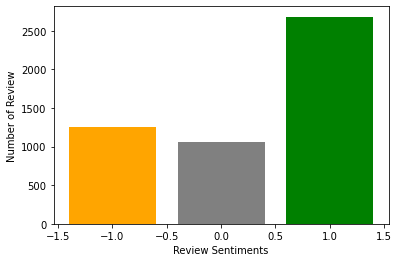

In [89]:
# plot sentiment count
from matplotlib import pyplot as plt
Sentiment_count=df_tweets.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'],color= color)
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_tweets = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
df_tweets_normalised = tfid_tweets.fit_transform(df_tweets['content'])
df_tweets_normalised

<5000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 51215 stored elements in Compressed Sparse Row format>

In [91]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tweets_normalised, df_tweets['sentiment'], test_size=0.25, random_state=1)

In [92]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train, y_train)
predicted= mnb.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6216


In [93]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_test,predictions))

#f1-score
print(f1_score(y_test,predictions,average='micro'))

#Accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)


[[159  31 120]
 [  6 169  96]
 [ 47  45 577]]
0.724
72.39999999999999
